<a href="https://colab.research.google.com/github/MykytaRiadnyna/Expected-goals-prediction-model-xG/blob/main/xG_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Model for predicting xG expected goals in soccer matches**

## What is it and what is it for?

Football is the most popular sport. For example, the 2022 FIFA World Cup final between France and Argentina had the highest number of viewers of any sporting event - a whopping 1.5 billion. About 516.6 million people watched the last World Cup final in 2018, and more than 3.5 billion viewers watched the tournament in total. About 600 million viewers watched the EURO 2016 final. (Source - https://topsoccerblog.com/top-most-watched-football-matches/)

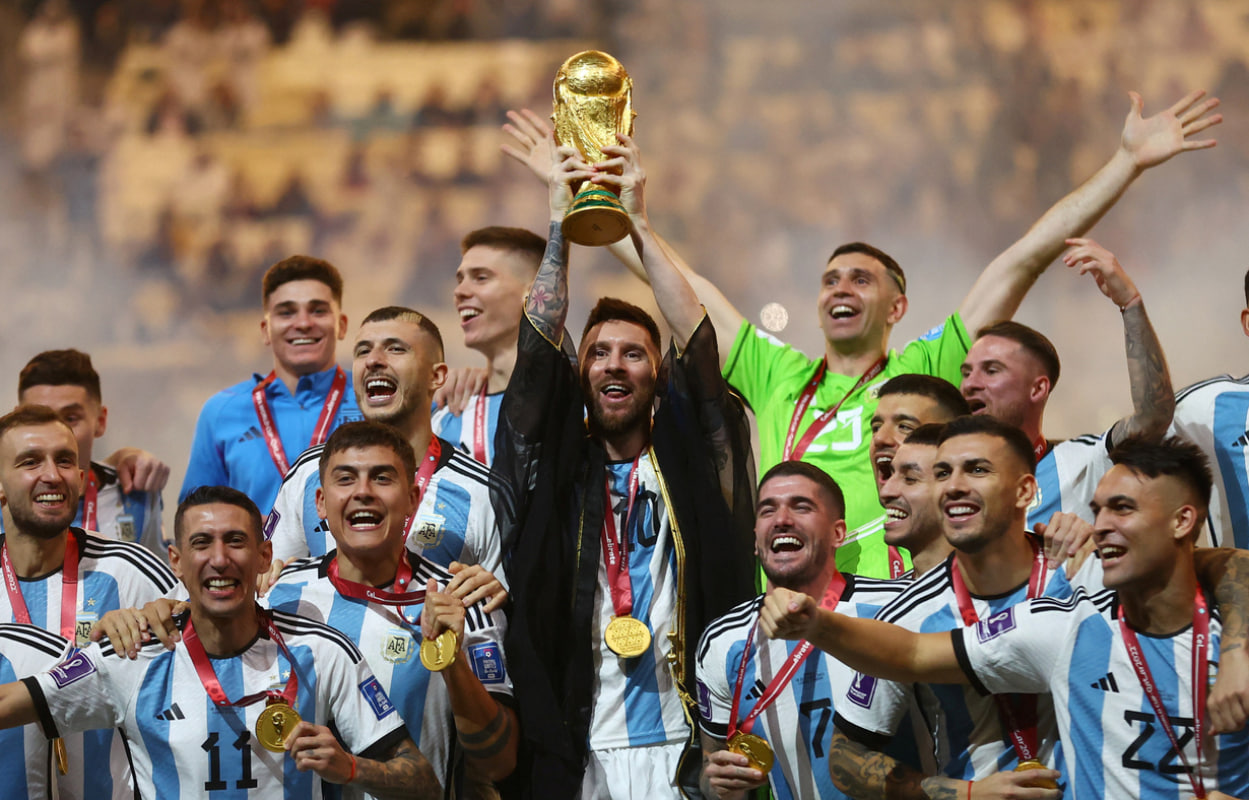

Source - https://www.reuters.com/lifestyle/sports/argentina-win-incredible-final-penalties-2022-12-18/

As it has already become clear, football attracts attention and inspires, so teams, coaches and bookmakers strive for the top, and for this they use analysis that allows you to better understand and predict the game.

An example of such analysis is the xG Expected Goals Prediction Model, which allows for a more detailed look at shot statistics, and programming the level of danger from each of the moments.
xG is a football match analysis method that calculates the probability of a goal scored (xG - Expected Goals) for each shot within a value between 0.01 and 1. By summing up the scores of all moments, xG gives an alternative result of the match, reflecting a more accurate effort on the field. This method evaluates the effectiveness of chance creation, ignoring the effects of luck, mood and player class. It is important to note that a win by expected goals does not always mean a win by score, but it always indicates which team did more to win.

Basically, these data can be used to determine young talents, and in general, the success of actions on the field of attackers. For example, if during the season the player scored a significantly higher number of goals than the threat level, from all the shots he made, then this indicates a high level of the player's game.

# How to build classification models

Different machine learning algorithms can be used to build a model for predicting expected goals (xG) in football matches. The model for this work will use: logistic regression and random forest.

## Logistic regression
The logistic function - also known as the sigmoid function, is a key element of logistic regression. It converts any real number value into a value between 0 and 1, which is interpreted as a probability.

The logistics function is as follows:

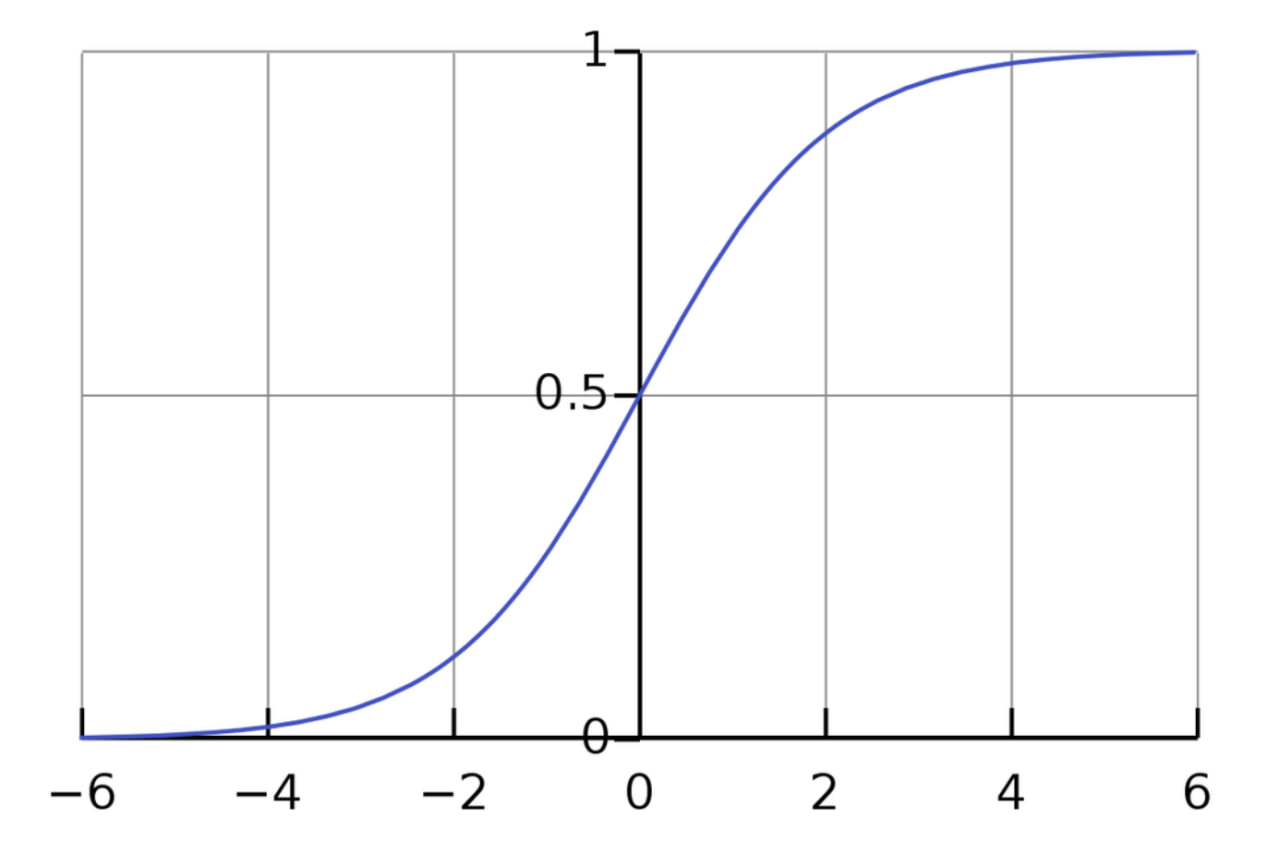

Source - https://en.wikipedia.org/wiki/Logistic_function

## Random forest

Decision trees are the basis of the random forest method. It is a machine learning model used to make decisions by dividing data into subsets using rules based on feature values.

Graphically depicts the principle of operation of a random forest:

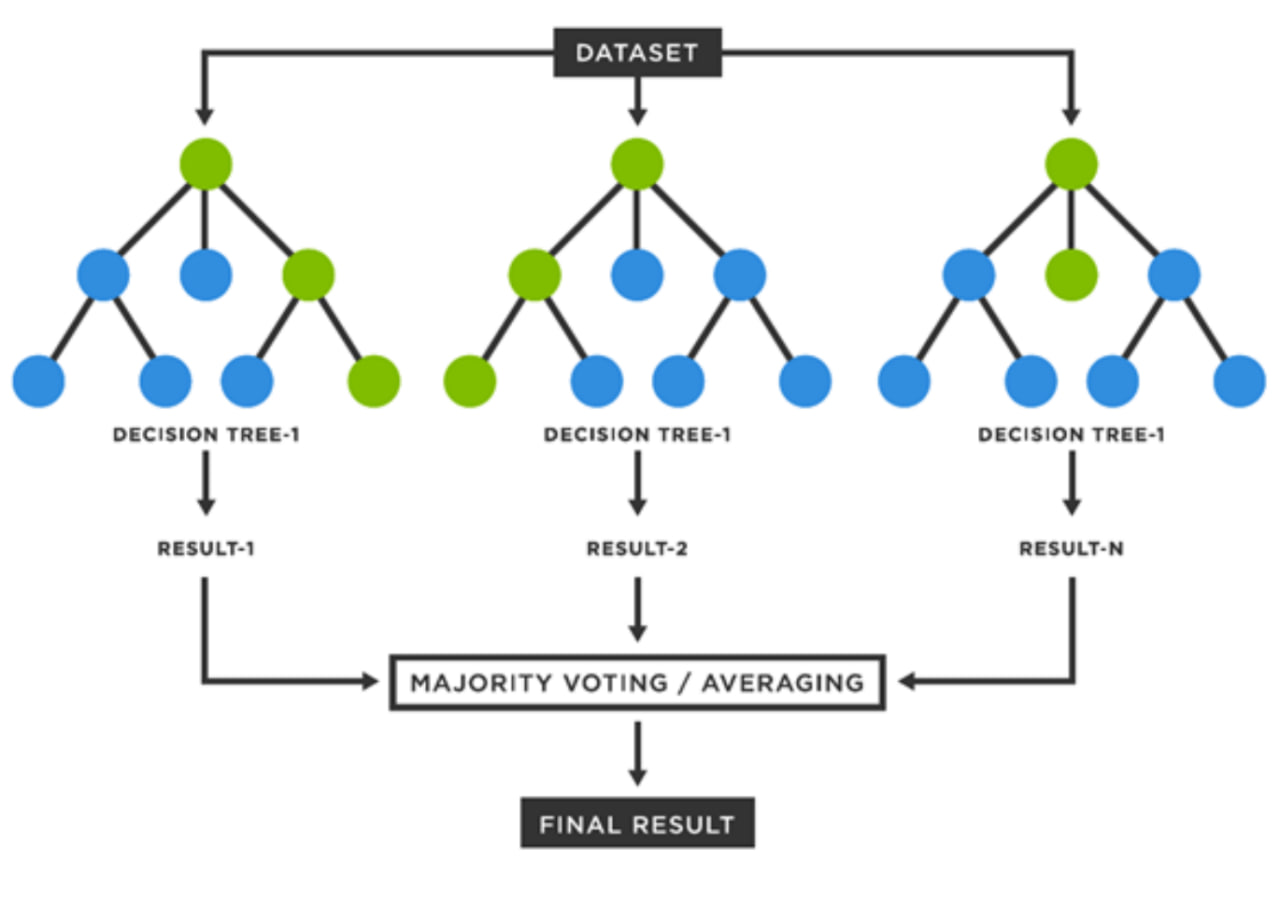

Source - https://dou.ua/forums/topic/35371/

# DATA SET ANALYSIS

Data on goal kicks are used to build the Expected Goals (xG) prediction model, specifically: distance, goal kick angle, kick type (free kick or free kick), and the part of the body used to hit the goal.

Similar models use data sets that can contain up to 50 different types of impact factors to make the data produced by the model more realistic, but all such data sets are commercial, so for my model I used a smaller, affordable, data set. Of course, my model will show worse and not so reliable indicators, but as the result will show, the model is very close to the average, general indicators.

As mentioned earlier, the data set on which the model for predicting expected goals in soccer matches is trained consists of the following variables: Distance, angle, shot type, and body part. Let's extract each of them in order to better understand what we are dealing with, see certain patterns and sequences, and build graphs of dependence on various factors. In order to better understand the data we are dealing with.

To begin with, we import all the necessary libraries for the model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Next step, we load the data, check the data structure, count and display the total number of shots and goals

In [ ]:
# File upload from local computer
uploaded = files.upload()

# Loading data
train_data = pd.read_pickle('train.pkl')
test_data = pd.read_pickle('test.pkl')

# Checking data structure
print('\nExample of training data')
print(train_data.head())

# Displaying the total number of shots and goals in the training set:
total_shots_train = train_data.shape[0]
total_goals_train = train_data['target'].sum()
print('\nTotal number of shots in the training set: {}'.format(total_shots_train))
print('Total number of goals in the training set: {}'.format(total_goals_train))

print('\nExample of test data')
print(test_data.head())

# Displaying the total number of shots and goals in the test set:
total_shots_test = test_data.shape[0]
total_goals_test = test_data['target'].sum()
print('\nTotal number of shots in the test set: {}'.format(total_shots_test))
print('Total number of goals in the test set: {}'.format(total_goals_test))

Saving test.pkl to test.pkl
Saving train.pkl to train.pkl

Example of training data
   target  x0_Open Play  x1_Foot  x1_Head   distance      angle
0       0             1        1        0  10.801701  24.151436
1       0             1        1        0   5.484549  56.675147
2       0             1        1        0  21.877267  16.627790
3       0             1        0        1   3.641772  90.400691
4       0             1        1        0  22.017272  17.200029

Total number of shots in the training set: 15732
Total number of goals in the training set: 1874

Example of test data
   target  x0_Open Play  x1_Foot  x1_Head   distance      angle
0       0             1        1        0  10.248158   7.494096
1       0             1        1        0   8.898356  38.335830
2       0             1        1        0  16.335055  24.254945
3       0             1        1        0  10.437765  36.141772
4       0             1        1        0  25.368358  15.849155

Total number of shots in th

As you can see, in total there are more than 20,000 hits in the data set, of which approximately 2,500 are goals

Separation into features and target variable

In [ ]:
X_train = train_data.drop(columns='target')
y_train = train_data['target']
X_test = test_data.drop(columns='target')
y_test = test_data['target']

We create two graphs:
*   The first graph shows the number of kicks and headers.
*   The second graph shows the percentage of successful hits for each body part.

<ipython-input-4-9225154b4a5d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='shot_body_part', palette='viridis', order=order)
<ipython-input-4-9225154b4a5d>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='shot_body_part', y='success_rate', data=summary, palette='viridis', order=order)


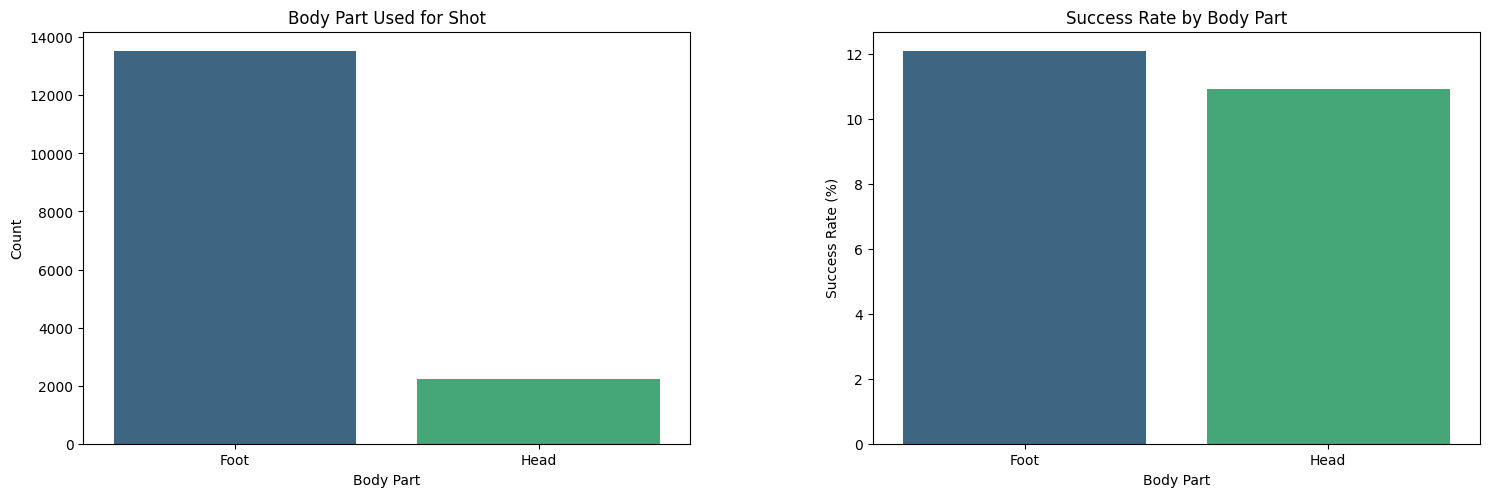

In [ ]:
# Adding new column 'shot_body_part'
train_data['shot_body_part'] = train_data.apply(
    lambda row: 'Foot' if row['x1_Foot'] == 1 else 'Head', axis=1)

# Setting a fixed order for categories
order = ['Foot', 'Head']

plt.figure(figsize=(15, 10))

# First plot
plt.subplot(2, 2, 1)
sns.countplot(data=train_data, x='shot_body_part', palette='viridis', order=order)
plt.title('Body Part Used for Shot')
plt.xlabel('Body Part')
plt.ylabel('Count')

# Counting the number of shots for each body part
summary = train_data.groupby('shot_body_part').agg(
    total_shots=('target', 'count'),
    successful_shots=('target', 'sum')
).reset_index()

# Adding a column with the percentage of successful shots
summary['success_rate'] = summary['successful_shots'] / summary['total_shots'] * 100

# Second plot
plt.subplot(2, 2, 2)
sns.barplot(x='shot_body_part', y='success_rate', data=summary, palette='viridis', order=order)
plt.title('Success Rate by Body Part')
plt.xlabel('Body Part')
plt.ylabel('Success Rate (%)')

# Adjusting the spacing between plots
plt.tight_layout()  # Automatic optimization of spacing
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Setting space between subplots

plt.show()

As you can see, there are significantly more kicks than headers, and the success rate of kicks is slightly higher than headers

We create two graphs:

*   The first graph shows the distribution of the number of hits by type (from game or other)

*  The second graph shows the percentage of successful hits for each type

<ipython-input-5-2cdcbe70e713>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='shot_type', order=shot_type_order, palette='pastel')
<ipython-input-5-2cdcbe70e713>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='shot_type', y='success_rate', data=summary_open_play, order=shot_type_order, palette='pastel')


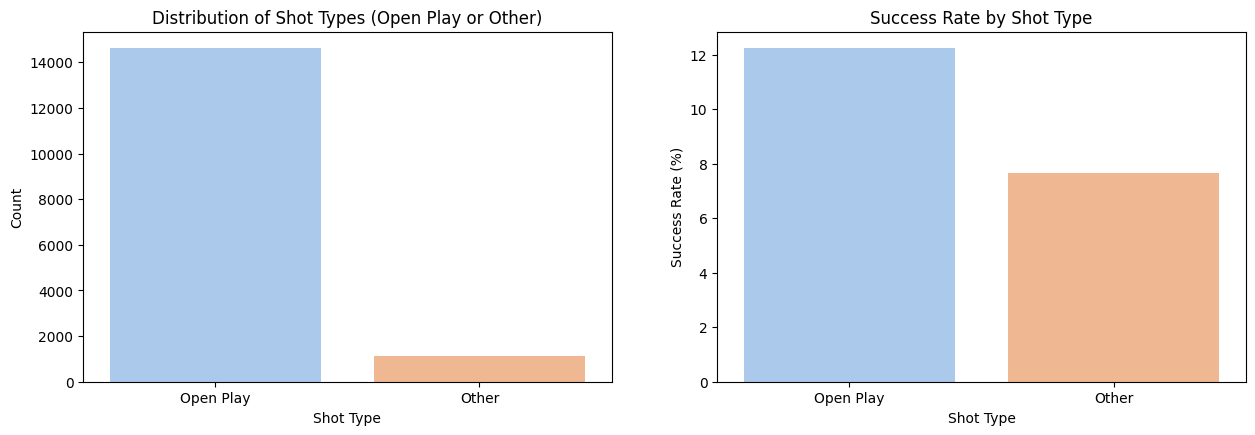

In [ ]:
# Converting x0_Open Play into a readable text format
train_data['shot_type'] = train_data['x0_Open Play'].apply(lambda x: 'Open Play' if x == 1 else 'Other')

# Setting the order of categories
shot_type_order = ['Open Play', 'Other']

# Creating the figure
plt.figure(figsize=(15, 10))

# Counting the number of shots for each shot type
summary_open_play = train_data.groupby('shot_type').agg(
    total_shots=('target', 'count'),
    successful_shots=('target', 'sum')
).reset_index()

# Adding a column with the percentage of successful shots
summary_open_play['success_rate'] = summary_open_play['successful_shots'] / summary_open_play['total_shots'] * 100

# Visualizing the distribution of shot types (open play or other)
plt.subplot(2, 2, 1)
sns.countplot(data=train_data, x='shot_type', order=shot_type_order, palette='pastel')
plt.title('Distribution of Shot Types (Open Play or Other)')
plt.xlabel('Shot Type')
plt.ylabel('Count')

# Visualizing the percentage of successful shots
plt.subplot(2, 2, 2)
sns.barplot(x='shot_type', y='success_rate', data=summary_open_play, order=shot_type_order, palette='pastel')
plt.title('Success Rate by Shot Type')
plt.xlabel('Shot Type')
plt.ylabel('Success Rate (%)')

plt.show()

As you can see, there are much more shots from the game, and their success rate is also higher

A heat map can be used to visualize the dependence of hit success on the type of hit and body part. This will allow us to simultaneously compare the impact of both factors on the success of the shot.

We count the number and success of blows for each type of blow and part of the body. Let's visualize the dependence of hit success on the type of hit and body part using a heat map.

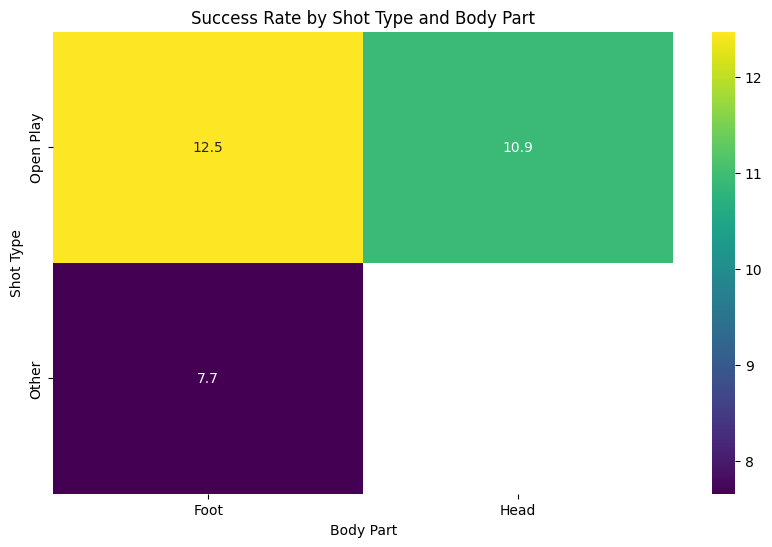

In [ ]:
# Creating a new variable for shot type
train_data['shot_body_part'] = train_data.apply(
    lambda row: 'Foot' if row['x1_Foot'] == 1 else 'Head', axis=1)

# Counting the number and success of shots for each shot type and body part
summary = train_data.groupby(['shot_type', 'shot_body_part']).agg(
    total_shots=('target', 'count'),
    successful_shots=('target', 'sum')
).reset_index()

# Adding a column with the percentage of successful shots
summary['success_rate'] = summary['successful_shots'] / summary['total_shots'] * 100

# Reshaping data for heatmap visualization
pivot_summary = summary.pivot(index='shot_type', columns='shot_body_part', values='success_rate')

# Visualizing the success rate dependency on shot type and body part
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_summary, annot=True, cmap='viridis', fmt=".1f")
plt.title('Success Rate by Shot Type and Body Part')
plt.xlabel('Body Part')
plt.ylabel('Shot Type')

plt.show()

The graph shows that free kicks are taken only from the foot, and that the probability of scoring from the foot is higher

Let's create a graph of the distance distribution of shots and calculate the percentage of successful shots for each range of distances and convert to whole numbers.

<ipython-input-7-428a6125d1a7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_range', y='target', data=summary_distance, palette='viridis',
<ipython-input-7-428a6125d1a7>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in plt.gca().get_yticks()])


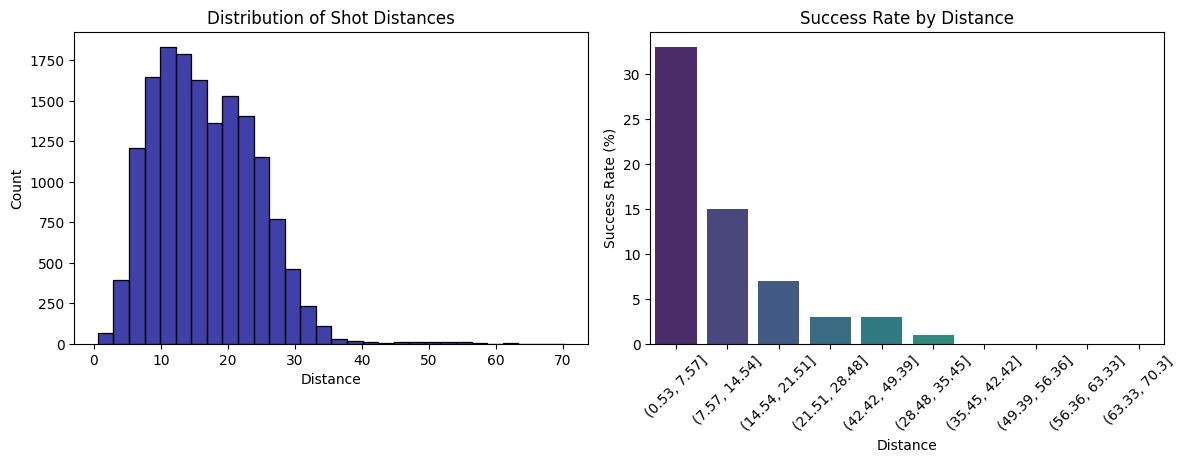

In [ ]:
# Visualizing feature distributions
plt.figure(figsize=(12, 8))

# Binning distance into ranges and rounding to tenths
train_data['distance_range'] = pd.cut(train_data['distance'].round(1), bins=10)

# Distribution of distance
plt.subplot(2, 2, 1)
sns.histplot(train_data['distance'], bins=30, color='darkblue')
plt.title('Distribution of Shot Distances')
plt.xlabel('Distance')
plt.ylabel('Count')

# Calculating the percentage of successful shots for each range and converting to integers
summary_distance = (train_data.groupby('distance_range')['target']
                    .mean()
                    .reset_index()
                    .assign(target=lambda x: (x['target'] * 100).astype(int)))

# Visualizing the success rate dependency on distance
plt.subplot(2, 2, 2)
sns.barplot(x='distance_range', y='target', data=summary_distance, palette='viridis',
            order=summary_distance.sort_values('target', ascending=False)['distance_range'])
plt.title('Success Rate by Distance')
plt.xlabel('Distance')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.tight_layout()

plt.show()

Most shots are made in the range of 5 to 25 meters, and the effectiveness of these shots is higher the closer to the goal

Let's create a histogram of the total number of hits for each angle and calculate the percentage of successful hits for each angle range and convert to whole numbers.

<ipython-input-8-5fd9e09a6551>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='angle_range', y='target', data=summary_angle, palette='viridis')
<ipython-input-8-5fd9e09a6551>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


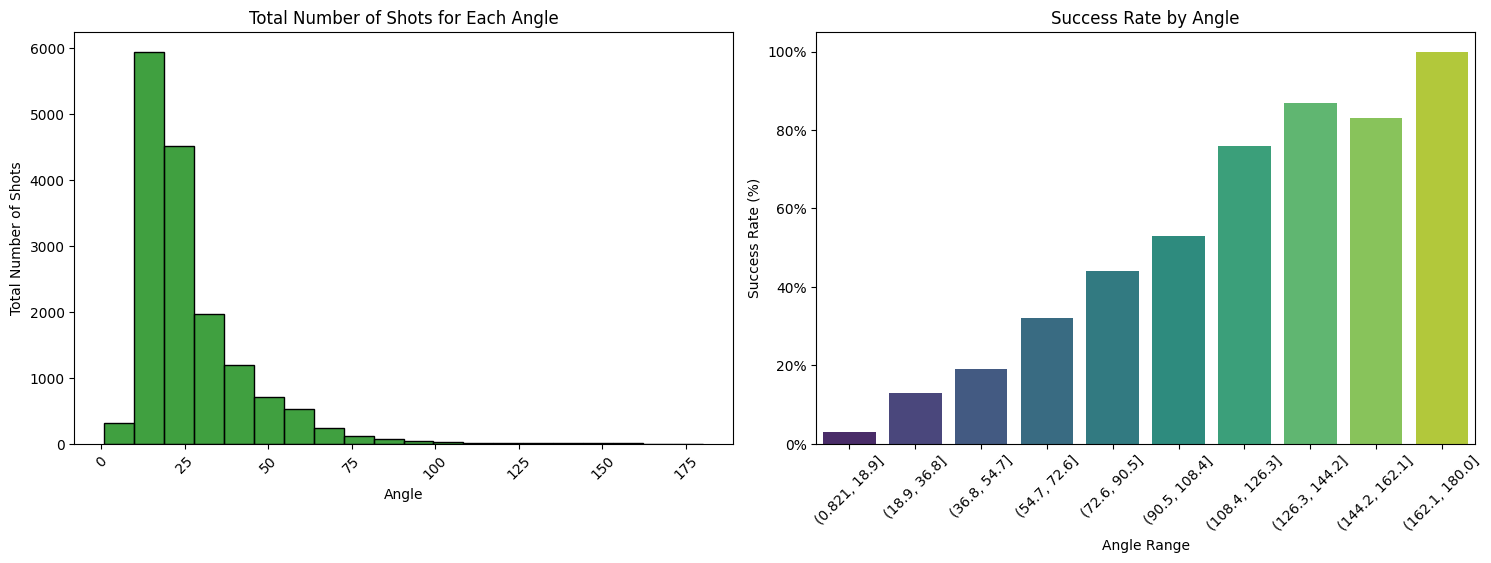

In [ ]:
plt.figure(figsize=(15, 10))

# Rounding angle values to whole numbers
train_data['rounded_angle'] = train_data['angle'].round()

# Plotting a histogram of the total number of shots for each angle
plt.subplot(2, 2, 1)
sns.histplot(train_data['rounded_angle'], bins=20, kde=False, color='green')
plt.title('Total Number of Shots for Each Angle')
plt.xlabel('Angle')
plt.ylabel('Total Number of Shots')
plt.xticks(rotation=45)
plt.tight_layout()

# Binning angle data into 10 ranges
train_data['angle_range'] = pd.cut(train_data['rounded_angle'], bins=10)

# Calculating the percentage of successful shots for each angle range and converting to integers
summary_angle = (train_data.groupby('angle_range')['target']
                 .mean()
                 .reset_index()
                 .assign(target=lambda x: (x['target'] * 100).astype(int)))

# Visualizing the success rate dependency on angle
plt.subplot(2, 2, 2)
sns.barplot(x='angle_range', y='target', data=summary_angle, palette='viridis')
plt.title('Success Rate by Angle')
plt.xlabel('Angle Range')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.tight_layout()

plt.show()

As can be seen from the graph, almost all blows were made from angles from 0 to 75 degrees, but the effectiveness of blows is greater from 75 to 180 degrees.


In order to better analyze these data, I suggest displaying a table with detailed information about the number of hits and their success for each corner.



In [ ]:
# Rounding angle values to whole numbers
train_data['rounded_angle'] = train_data['angle'].round()

# Creating new columns for angle ranges and counting successful shots
train_data['angle_range'] = pd.cut(train_data['rounded_angle'], bins=list(range(0, 190, 10)), right=False)

# Counting the total number of shots and successful shots for each angle range
summary_angle = train_data.groupby('angle_range').agg(
    total_shots=('target', 'count'),
    successful_shots=('target', 'sum')
).reset_index()

# Adding the percentage of successful shots
summary_angle['success_rate'] = (summary_angle['successful_shots'] / summary_angle['total_shots'] * 100).round(2)

# Displaying the result in tabular form
print(summary_angle)

   angle_range  total_shots  successful_shots  success_rate
0      [0, 10)          313                 7          2.24
1     [10, 20)         6769               284          4.20
2     [20, 30)         4294               545         12.69
3     [30, 40)         1855               328         17.68
4     [40, 50)         1062               212         19.96
5     [50, 60)          666               169         25.38
6     [60, 70)          406               130         32.02
7     [70, 80)          156                73         46.79
8     [80, 90)           74                36         48.65
9    [90, 100)           49                26         53.06
10  [100, 110)           38                21         55.26
11  [110, 120)            9                 8         88.89
12  [120, 130)           15                12         80.00
13  [130, 140)            7                 7        100.00
14  [140, 150)            9                 7         77.78
15  [150, 160)            7             

This data is incorrect because, since there are critically few hits in the range from 75 to 180 degrees, but their success rate is almost 100%, so this data will have less impact on the model in terms of its correctness.

Let's calculate the percentage of successful shots for each combination of angles and distances and build a heat map that displays the percentage of successful shots depending on the angle and distance.

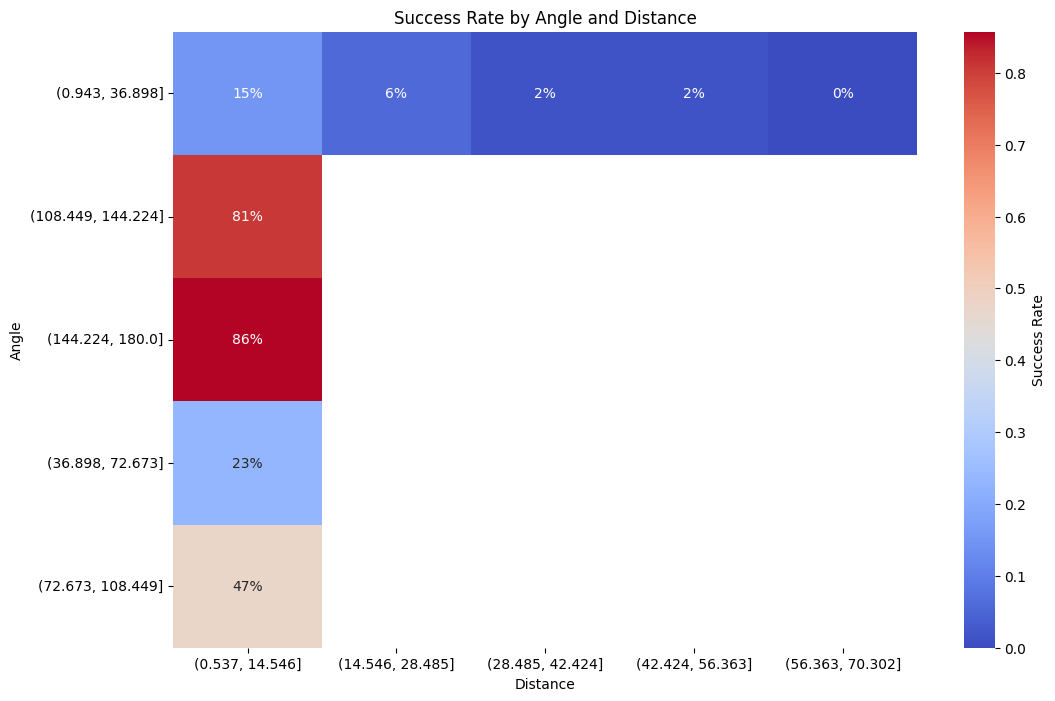

In [ ]:
# Binning angle
train_data['angle_bin'] = pd.cut(train_data['angle'], bins=5)

# Binning distance
train_data['distance_bin'] = pd.cut(train_data['distance'], bins=5)

# Calculating the percentage of successful shots for each combination of angle and distance
success_rates = train_data.groupby(['angle_bin', 'distance_bin'])['target'].mean().reset_index()

# Converting binned combinations to string format for labels
success_rates['angle_bin'] = success_rates['angle_bin'].astype(str)
success_rates['distance_bin'] = success_rates['distance_bin'].astype(str)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
pivot_table = success_rates.pivot_table(index='angle_bin', columns='distance_bin', values='target')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0%", cbar_kws={'label': 'Success Rate'})
plt.title('Success Rate by Angle and Distance')
plt.xlabel('Distance')
plt.ylabel('Angle')
plt.show()

as already said, the data on the angle of the shot are not indicative, due to their inaccuracy, but whoever is interested can consider the dependence of the success of these shots on the distance

Let's calculate the percentage of successful hits for each combination of distance and body part and build a heat map that displays the percentage of successful hits depending on the distance and body part.

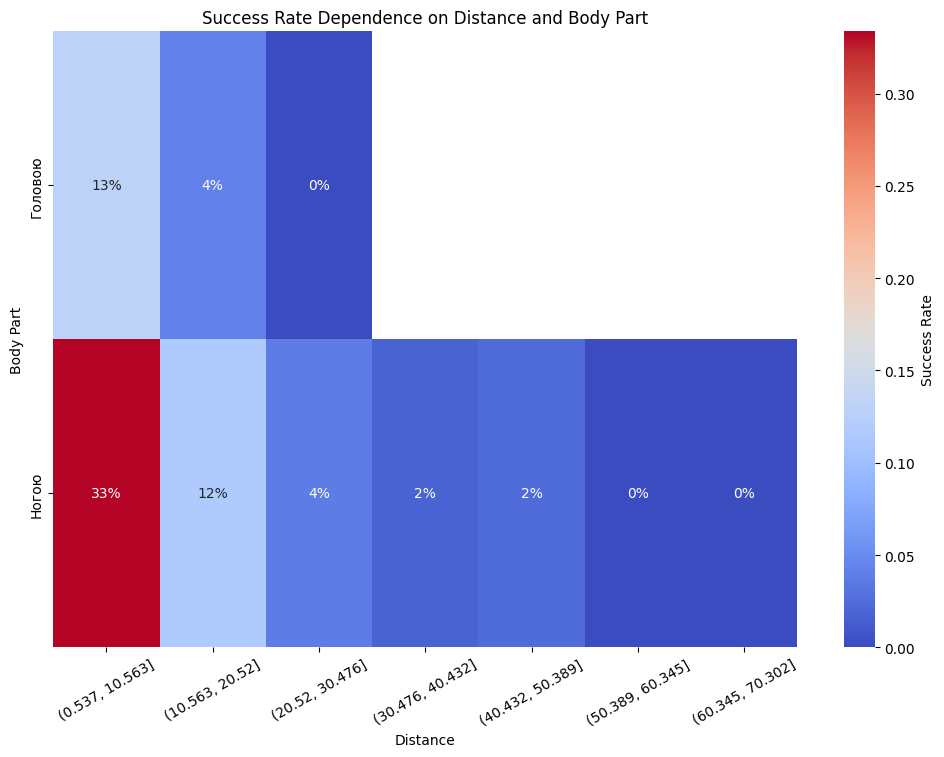

In [ ]:
# Creating a column indicating whether the shot was with foot or head
train_data['shot_body_part'] = train_data.apply(
    lambda row: 'Ногою' if row['x1_Foot'] == 1 else 'Головою', axis=1)

# Binning the distance into 7 bins
train_data['distance_bin'] = pd.cut(train_data['distance'], bins=7)

# Calculating the percentage of successful shots for each combination of distance and body part
success_rates = train_data.groupby(['distance_bin', 'shot_body_part'])['target'].mean().reset_index()

# Converting combined binning to string format for labels
success_rates['distance_bin'] = success_rates['distance_bin'].astype(str)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
pivot_table = success_rates.pivot_table(index='shot_body_part', columns='distance_bin', values='target')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0%", cbar_kws={'label': 'Success Rate'})
plt.xticks(rotation=30)
plt.title('Success Rate Dependence on Distance and Body Part')
plt.xlabel('Distance')
plt.ylabel('Body Part')
plt.show()

Interestingly, the graph shows that kicks up to 11 meters are scored in 33% of cases. The main success rate is 13%

Let's calculate the percentage of successful shots for each type of shot and distance range. and build a heat map showing the percentage of successful hits depending on the type of hit and distance.

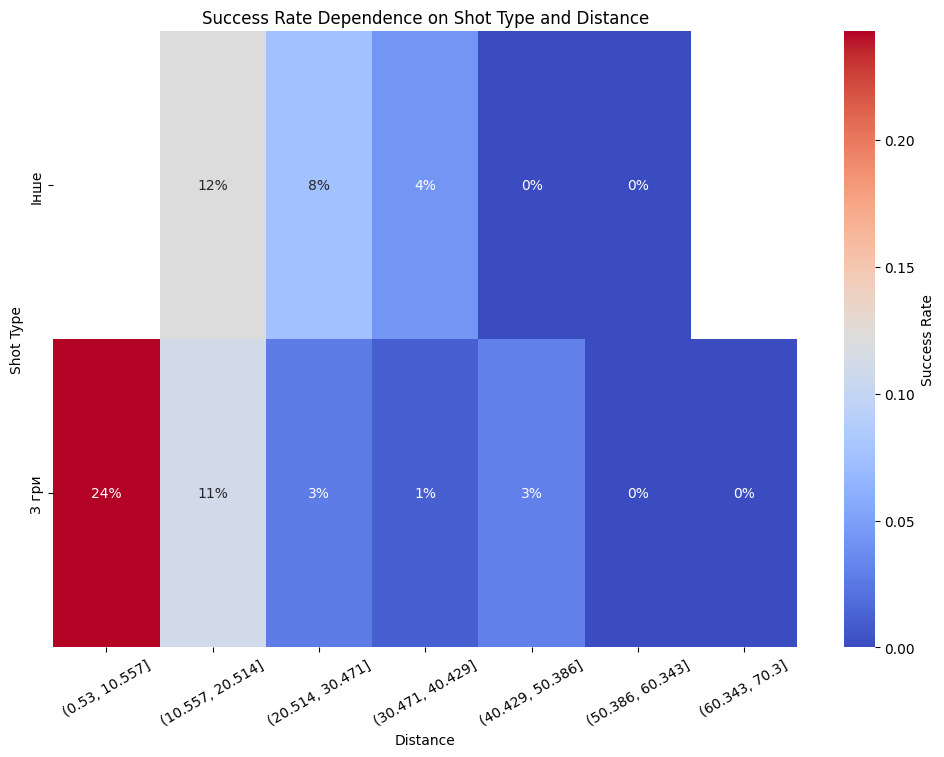

In [ ]:
# Replacing values in the column x0_Open Play
train_data['x0_Open Play'] = train_data['x0_Open Play'].replace({1: 'З гри', 0: 'Інше'})

# Binning the distance into 7 bins and rounding to the nearest tenth
train_data['distance_range'] = pd.cut(train_data['distance'].round(1), bins=7)

# Calculating the percentage of successful shots for each type of shot and distance range
success_rates = train_data.groupby(['x0_Open Play', 'distance_range'])['target'].mean().reset_index()

# Converting combined binning to string format for labels
success_rates['distance_range'] = success_rates['distance_range'].astype(str)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
pivot_table = success_rates.pivot_table(index='x0_Open Play', columns='distance_range', values='target')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0%", cbar_kws={'label': 'Success Rate'})
plt.title('Success Rate Dependence on Shot Type and Distance')
plt.xlabel('Distance')
plt.ylabel('Shot Type')
plt.xticks(rotation=30)
plt.show()

Kicks from 11 to 40 meters, from free kicks - carry more threat than kicks from free play

# Building of xG models

## Logistic Regression

LogisticRegression, from the sklearn library, is used to build a logistic regression model.

In order to build an effective model, it is necessary to choose the correct hyperparameters, such as regularization, value, degree of regularization, optimization algorithm, maximum number of iterations for the optimization algorithm, and weight of classes in the case of unbalanced data. For this you can use GridSearch.

GridSearch is a method for finding the best model hyperparameters by systematically sorting through combinations of different hyperparameter values ​​and evaluating their performance using cross-validation.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting hyperparameters for GridSearchCV
param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}

# Building a logistic regression model
model = LogisticRegression(random_state=42)

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


After the best hyperparameters have been selected, we will build a logistic regression model.

Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5624
           1       0.44      0.13      0.20       646

    accuracy                           0.89      6270
   macro avg       0.67      0.55      0.57      6270
weighted avg       0.86      0.89      0.87      6270



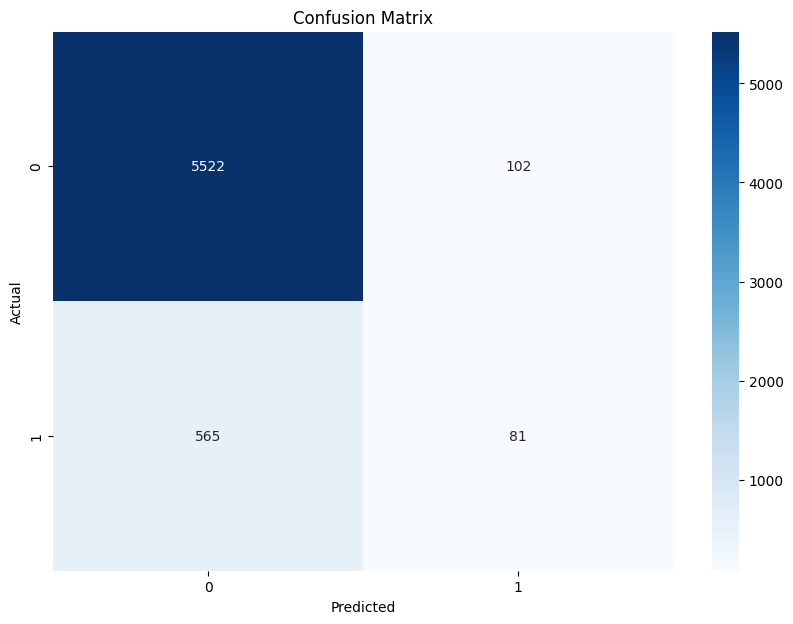

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building a logistic regression model with hyperparameters
model = LogisticRegression(
    penalty='l2',
    C=0.01,
    solver='liblinear',
    max_iter=100,
    random_state=42
)

# Fitting the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predicting on the test data
y_pred = model.predict(X_test_scaled)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing accuracy
print(f'Accuracy: {accuracy:.2f}')

# Printing classification report
print('\nClassification Report:')
print(class_report)

# Visualizing the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The accuracy of the model is 89%, let's see how it happened.

To do this, you need to use analysis metrics. I chose such metrics as the confusion matrix. This is a table that helps to evaluate the performance of classification algorithms. It outputs the number of correct and incorrect predictions. In our case,
the top left will be the number of non-goals that the model correctly identified as non-goals, the top right will be goals that the model incorrectly identified as goals, the bottom left will be non-goals that the model incorrectly predicted as goals, and the bottom right will be correctly classified goals.

Based on this data, you can calculate more detailed metrics, such as

*   precision - in our case - correctly classified goals from all moments that the model classified as goals.
*   Recall - is the percentage of correctly classified heads, out of all heads in the data set.
*   F1-score – helps to find a compromise between completeness and accuracy, in cases where the data is unevenly distributed across classes, as in our case when goals are only 10% of the total number of hits.
*   Support - helps to determine the balance of classes.


---

After analyzing the metrics, it can be seen that the model almost perfectly guesses non-goals and classifies goals poorly.

Why so?

Because this is a prediction model, not a classifier. The model determines the level of threat from a hit, from 0 to 1, and if the threat is higher than 0.5 - the classifier says that it is a goal. But it doesn't work that way, due to the high randomness of football, so we pay attention to the level of threat, not the percentage of correctly classified goals.

Why do this analysis then?

In order to make sure that the model is adequate.






## Random forest

RandomForestClassifier from the sklearn library is used to build a random forest model. And just like with the logistic regression model, the best hyperparameters will be selected using GridSearchCV.

RandomForestClassifier has the following hyperparameters:






*   n_estimators: Number of trees in the forest
*   max_depth: Maximum depth of each tree
*   min_samples_split: Minimum number of samples needed to branch an internal node
*   min_samples_leaf: Minimum number of samples needed for a leaf
*   max_features: Number of features to consider when finding the best split.
*   class_weight



In [ ]:
# Importing necessary libraries
from sklearn.model_selection import GridSearchCV

# Defining parameters to optimize
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

# Initializing the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Grid search with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Training the model with the best parameters
grid_search.fit(X_train, y_train)

# Printing the best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)

Best parameters: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.8860920025752334


After that, we will build the model

Accuracy (Validation): 88.48%


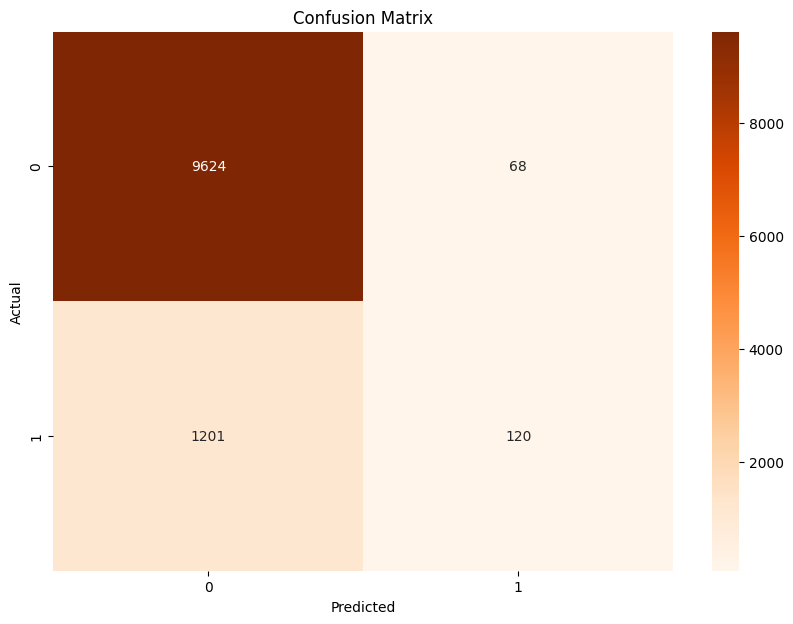


Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      9692
           1       0.64      0.09      0.16      1321

    accuracy                           0.88     11013
   macro avg       0.76      0.54      0.55     11013
weighted avg       0.86      0.88      0.84     11013

Accuracy (Test): 89.33%


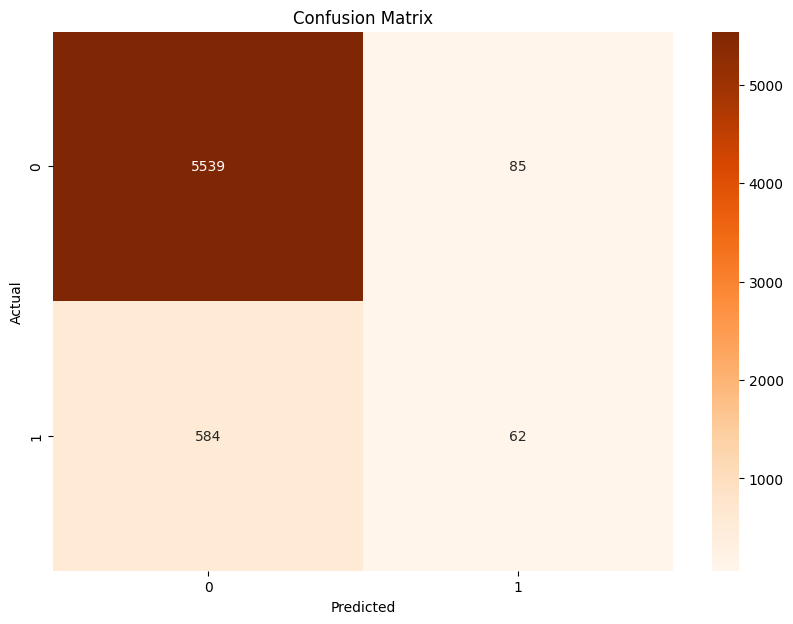


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5624
           1       0.42      0.10      0.16       646

    accuracy                           0.89      6270
   macro avg       0.66      0.54      0.55      6270
weighted avg       0.85      0.89      0.86      6270



In [ ]:
# Splitting the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.7, random_state=42)

# Initializing the model with class_weight=None (or simply remove this argument)
model = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=150, class_weight=None, random_state=42)
model.fit(X_train_split, y_train_split)

# Predicting on the validation set
y_pred_val = model.predict(X_val)

# Evaluating the model on the validation set
print("Accuracy (Validation): {:.2f}%".format(accuracy_score(y_val, y_pred_val) * 100))

# Visualizing the confusion matrix for validation set
conf_matrix = confusion_matrix(y_val, y_pred_val)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report (Validation):")
print(classification_report(y_val, y_pred_val))

# Predicting on the test set
y_pred_test = model.predict(X_test)

# Evaluating the model on the test set
print("Accuracy (Test): {:.2f}%".format(accuracy_score(y_test, y_pred_test) * 100))

# Visualizing the confusion matrix for test set
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

During the use of a random forest model, validation is used.

Validation is the process of evaluating the performance of a machine learning model on unseen data to test its ability to generalize. It involves dividing the data into training, validation, and test sets, which allows you to determine how well the model will perform on new, unknown data. Helps to detect whether the model is over-fitted to the training data. Provides an unbiased estimate of model performance on unseen data. In the training process, it can indicate when to stop training to avoid overfittining.

---

As can be seen from the metrics, some indicators have become better, some worse, but the accuracy of the model has not changed.

Precision for the goal class became much higher, so we will use this model in the future


# Testing the xG prediction model

Let's look at a theoretical example of using the Expected Goals (xG) prediction model to analyze a soccer match. Let's say one team has 20 shots per game, so we'll take 20 random shots from the test set and calculate the total threat rating of all the moments

In [ ]:
# Function to select random shots and display their features and xG
def predict_random_shots(model, X_test, y_test, num_shots=20):
    # Generate random indices to select shots
    random_indices = np.random.choice(X_test.shape[0], num_shots, replace=False)
    random_shots = X_test.iloc[random_indices]  # Get data for selected shots
    xG_predictions = model.predict_proba(random_shots)[:, 1]  # Predict xG for each shot

    # Print features and xG for each random shot
    print("Features and xG for {} random shots:".format(num_shots))
    total_xG = 0  # Variable for total xG
    for i in range(num_shots):
        print("\nShot {}: ".format(i+1))
        print(random_shots.iloc[i])  # Display features for the shot
        print("Predicted xG: {:.4f}".format(xG_predictions[i]))  # Display predicted xG
        total_xG += xG_predictions[i]  # Add predicted xG to total sum
        if y_test.iloc[random_indices[i]] == 1:
            print("This shot was a goal.")
        else:
            print("This shot was not a goal.")

    print("\nTotal expected goals for {} random shots: {:.4f}".format(num_shots, total_xG))

predict_random_shots(model, X_test, y_test)

Features and xG for 20 random shots:

Shot 1: 
x0_Open Play     1.000000
x1_Foot          0.000000
x1_Head          1.000000
distance         9.045115
angle           34.815753
Name: 3900, dtype: float64
Predicted xG: 0.0327
This shot was not a goal.

Shot 2: 
x0_Open Play     1.000000
x1_Foot          1.000000
x1_Head          0.000000
distance        12.638956
angle           27.677957
Name: 5515, dtype: float64
Predicted xG: 0.1897
This shot was not a goal.

Shot 3: 
x0_Open Play     1.000000
x1_Foot          1.000000
x1_Head          0.000000
distance        24.144616
angle           16.737807
Name: 2909, dtype: float64
Predicted xG: 0.0964
This shot was not a goal.

Shot 4: 
x0_Open Play     1.000000
x1_Foot          1.000000
x1_Head          0.000000
distance        25.293114
angle           14.590567
Name: 1954, dtype: float64
Predicted xG: 0.0112
This shot was not a goal.

Shot 5: 
x0_Open Play     1.000000
x1_Foot          1.000000
x1_Head          0.000000
distance        14.

Expected goals for 20 random shots equals 2.1905, that is, the total danger from each shot is 2 goals, but the team scored 3 goals. This means that at some point they could be lucky, or the opponents made a mistake, or the attacker's game was at a very high level. It is not right to draw such conclusions from one game only based on information and statistics collected during the season. But this will allow you to see how much of a threat the team created in this particular match.

---


I suggest you take a closer look at some shots



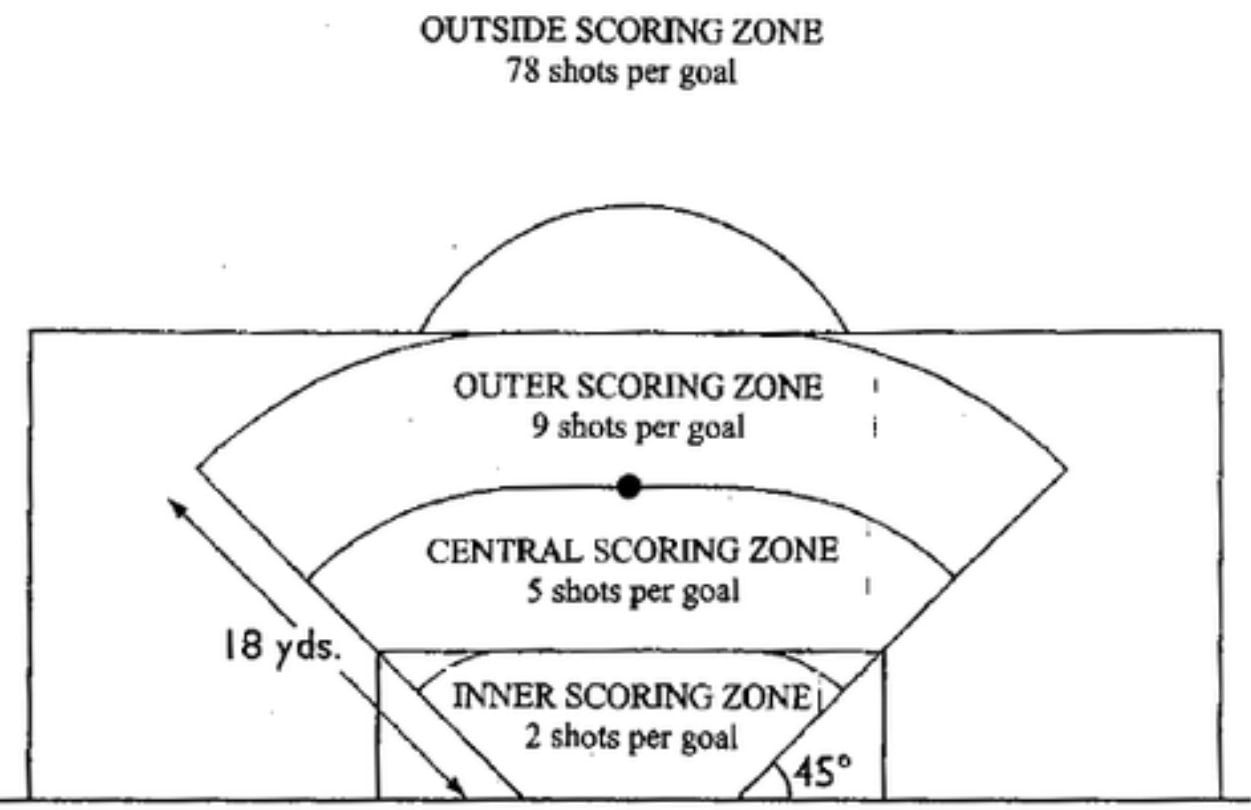

Source - https://www.researchgate.net/profile/Richard-Pollard-3/publication/240641737_Estimating_the_probability_of_a_shot_resulting_in_a_goal_The_effects_of_distance_angle_and_space/links/5440a87c0cf2be1758d009e9/Estimating-the-probability-of-a-shot-resulting-in-a-goal-The-effects-of-distance-angle-and-space.pdf

This is the general statistics of kicks in football matches. The figure shows that shots in the inner scoring zone have a success rate of 50%, from the central scoring zone - 20%, from the outer scoring zone - 11%, and shots from outside this zone have an average probability of 1.28%.

These info will help to understand to what extent our model adequately assesses the risks.

For example Shot 11:

```
x0_Open Play     1.000000
x1_Foot          1.000000
x1_Head          0.000000
distance         9.290151
angle           42.414924
Name: 5419, dtype: float64
Predicted xG: 0.3428
This shot was not a goal.
```

The shot is kicked, from free play, at an angle of 42 degrees, and a distance of 9 meters. Which is quite dangerous, because the blow comes from the central scoring zone.

Predicted xG is 0.34, which can be interpreted as the probability of scoring this shot - 34%. Which roughly coincides with the data shown in the picture. But this time the blow did not end successfully.


Next:
```
Shot 17:
x0_Open Play     1.000000
x1_Foot          1.000000
x1_Head          0.000000
distance        18.281742
angle           18.069941
Name: 2728, dtype: float64
Predicted xG: 0.0232
This shot was not a goal.
```
The kick is kicked, from free play, at a bad awkward angle of 18 degrees, at a distance of 18 meters, which is quite far. Obviously, this strike has a low threat and the model correctly predicts only 2%. and this shot was not a goal.




And last one:
```
Shot 18:
x0_Open Play     1.000000
x1_Foot          1.000000
x1_Head          0.000000
distance         8.398826
angle           23.944373
Name: 1153, dtype: float64
Predicted xG: 0.1853
This shot was a goal.
```

The kick is taken from a free play, from 8 meters and at a bad angle of 23 degrees. The model predicts 18%, which is about right, because the shot is not in the scoring zone, but still close to the goalkeeper gate. And this time it's a goal.

Okay, my project comes to an end, thank you for your attention and your time. The model for predicting expected goals is ready and shows good results.



# Conclusions and problems

The main problems when developing such models are the small number of goals compared to the total number of shots, for example, in the data set I used, about 10% of goals and all shots.

Also, the main problem is the randomness of a large number of goals. As has already been demonstrated in the work, often a shot that has a low probability of being scored is somehow miraculously scored, and often an almost guaranteed goal is not scored.

But our model is nevertheless an effective tool for impact danger analysis, regardless of whether it has been implemented or not.

It can also be noted that there are many similar models. It will not be difficult to transform this model into a model for predicting the effectiveness of goal assists, in order to determine the effectiveness of playmakers. Or such a model can be part of a larger model, such as a match prediction model.

## Literature and other interesting links



*   Information on the number of spectators of football matches - https://topsoccerblog.com/top-most-watched-football-matches/
*   What is expected goals (xG) - :  https://en.wikipedia.org/wiki/Expected_goals
*   About machine learning in general - https://www.databricks.com/glossary/machine-learning-models
*   Machine learning in sports Daghstul seminar - https://www.dagstuhl.de/en/seminars/seminar-calendar/seminar-details/21411
*   Pollard, Richard; Ensum, Jake; Taylor, Samuel (2004).  Estimating the probability of a shot resulting in a goal: The effects of distance, angle and space - https://www.researchgate.net/profile/Richard-Pollard-3/publication/240641737_Estimating_the_probability_of_a_shot_resulting_in_a_goal_The_effects_of_distance_angle_and_space/links/5440a87c0cf2be1758d009e9/Estimating-the-probability-of-a-shot-resulting-in-a-goal-The-effects-of-distance-angle-and-space.pdf



